In [5]:
import pandas as pd
import os

data_dir = "../data"

user_sample = pd.read_json(os.path.join(data_dir, "user_sample.json"), lines=True)
edge_sample = pd.read_csv(os.path.join(data_dir, "edge_sample.csv"))
label_sample = pd.read_csv(os.path.join(data_dir, "label_sample.csv"))


In [6]:
user_sample

,created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld
0,2020-01-16 02:02:55,Theoretical Computer Scientist. See also https...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u1217628182611927040,"Cambridge, MA",Boaz Barak,NaN,https://pbs.twimg.com/profile_images/125226236...,False,"{'followers_count': 7316, 'following_count': 2...",https://t.co/BoMip9FF17,boazbaraktcs,False,NaN
1,2014-07-02 17:56:46,creative _,None,u2664730894,🎈,olawale 💨,NaN,https://pbs.twimg.com/profile_images/147837638...,False,"{'followers_count': 123, 'following_count': 10...",,wale_io,False,NaN
2,2020-05-30 12:10:45,👽,None,u1266703520205549568,None,panagiota_.b,NaN,https://pbs.twimg.com/profile_images/142608606...,False,"{'followers_count': 3, 'following_count': 62, ...",,b_panagiota,False,NaN
3,2019-01-26 13:52:49,mama to maya. ABIM research pathway fellow @UV...,"{'description': {'mentions': [{'start': 43, 'e...",u1089159225148882949,"Charlottesville, VA","Jacqueline Hodges, MD MPH",NaN,https://pbs.twimg.com/profile_images/130229171...,False,"{'followers_count': 350, 'following_count': 57...",,jachodges_md,False,NaN
4,2009-04-30 19:01:42,Father / SWT Alumnus / Longhorn Fan,None,u36741729,United States,Matthew Stubblefield,NaN,https://pbs.twimg.com/profile_images/145808462...,True,"{'followers_count': 240, 'following_count': 29...",,Matthew_Brody,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-25 02:47:36,,None,u3040728619,None,dottie davis,NaN,https://abs.twimg.com/sticky/default_profile_i...,False,"{'followers_count': 1, 'following_count': 41, ...",,cantyp2davis,False,NaN
996,2011-03-13 23:37:41,,None,u265663532,None,Alex,NaN,https://abs.twimg.com/sticky/default_profile_i...,False,"{'followers_count': 22, 'following_count': 101...",,alex110314,False,NaN
997,2014-02-24 12:30:20,ever wasting time on the next new thing. they/...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u2359436953,"Washington, DC",Nic Fishman,NaN,https://pbs.twimg.com/profile_images/626386515...,False,"{'followers_count': 589, 'following_count': 73...",https://t.co/XPqK0EIPzo,njwfish,False,NaN
998,2009-03-09 19:56:48,In the pursuit of being effortlessly present. ...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u23490311,"Cape Cod, Ma",Andrew Voirol 🍷🍣🧬🔬,NaN,https://pbs.twimg.com/profile_images/139630311...,False,"{'followers_count': 1199, 'following_count': 4...",https://t.co/z8MsxsyZjX,AndrewVoirol,False,NaN


In [7]:
edge_sample

,source_id,relation,target_id
0,u320239495,following,u1193983696627544065
1,u911514942335012864,following,u50343115
2,u3393521,following,u15143478
3,u4218360677,following,u16303106
4,u879417518405951490,following,u2541047887
...,...,...,...
623674,t1488247058222010376,retweeted,t1487151924747153409
623675,t1462053130980450304,retweeted,t1461713254867156995
623676,t1318575834035376128,retweeted,t1311501345011183624
623677,t1323599040458694658,retweeted,t1323502926644436992


In [8]:
label_sample

,id,label
0,u1217628182611927040,human
1,u2664730894,human
2,u1266703520205549568,human
3,u1089159225148882949,human
4,u36741729,bot
...,...,...
995,u3040728619,bot
996,u265663532,human
997,u2359436953,human
998,u23490311,human


In [10]:
num_user = len(label_sample)
human_user = 0
bot_user = 0
for index, row in label_sample.iterrows():
    if row['label'] == 'human':
        human_user += 1
    else:
        bot_user += 1
print('Number of users in dataset:', num_user)
print('Number of Bot users:', bot_user)
print('Number of Human users:', human_user)

Number of users in dataset: 1000
Number of Bot users: 146
Number of Human users: 854


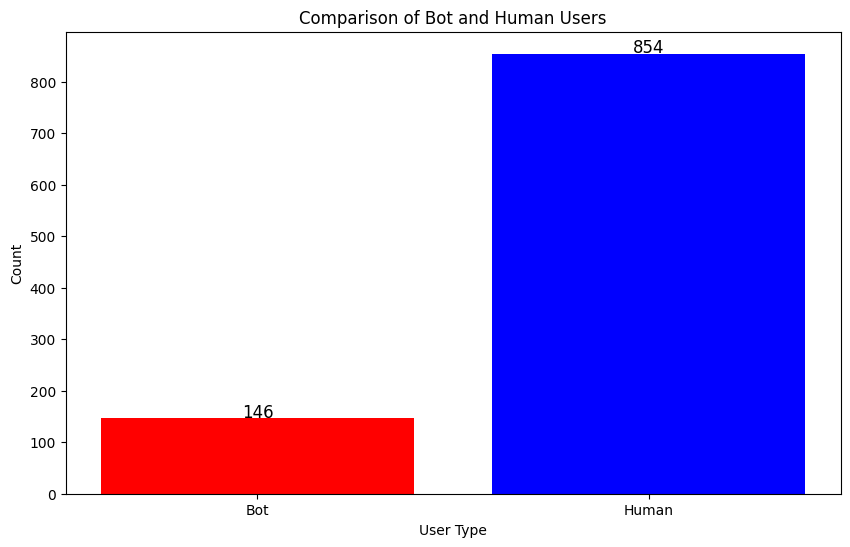

In [13]:
import matplotlib.pyplot as plt

# 数据
labels = ['Bot', 'Human']
counts = [bot_user, human_user]

plt.figure(figsize=(10, 6))  
plt.bar(labels, counts, color=['red', 'blue'])

plt.xlabel("User Type")
plt.ylabel("Count")
plt.title("Comparison of Bot and Human Users")

for i, v in enumerate(counts):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.show()


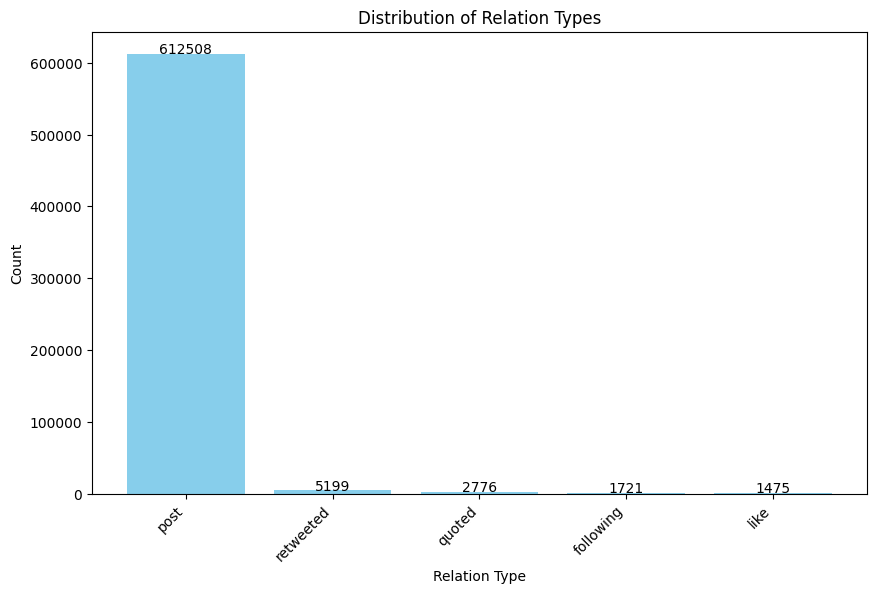

In [15]:
import matplotlib.pyplot as plt

relation_counts = edge_sample['relation'].value_counts()

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(relation_counts.index, relation_counts.values, color='skyblue')

plt.xlabel("Relation Type")
plt.ylabel("Count")
plt.title("Distribution of Relation Types")

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(relation_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10)

plt.show()


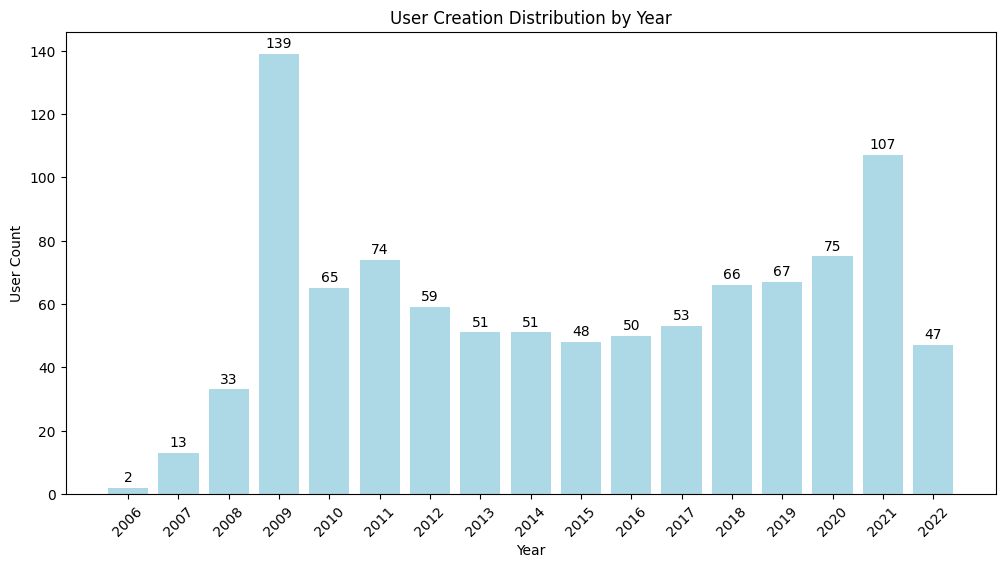

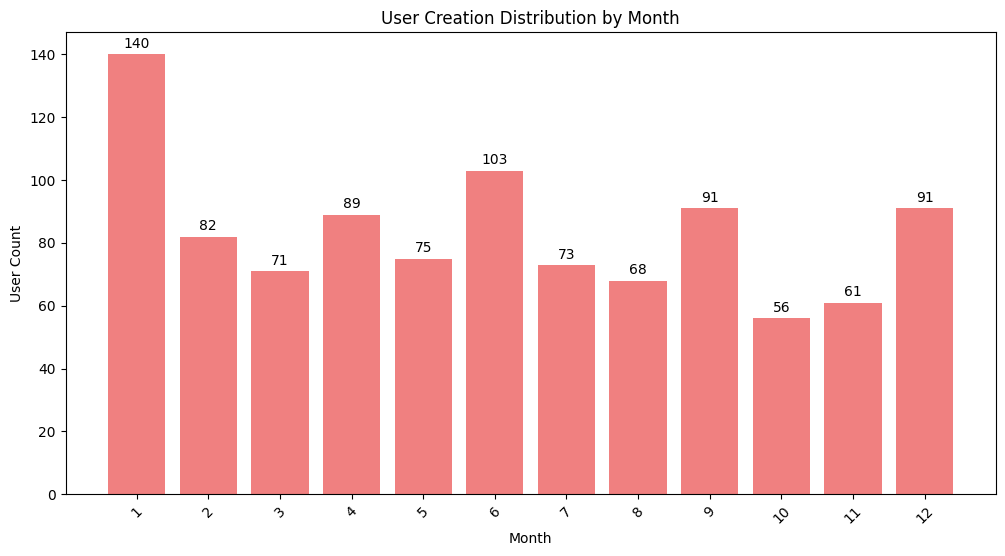

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

user_sample['created_at'] = pd.to_datetime(user_sample['created_at'], format='%Y-%m-%d %H:%M:%S')

user_sample['year'] = user_sample['created_at'].dt.year
user_sample['month'] = user_sample['created_at'].dt.month

year_counts = user_sample['year'].value_counts().sort_index()
month_counts = user_sample['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, color='lightblue')
plt.xlabel("Year")
plt.ylabel("User Count")
plt.title("User Creation Distribution by Year")
plt.xticks(rotation=45)
for i, v in enumerate(year_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(month_counts.index.astype(str), month_counts.values, color='lightcoral')
plt.xlabel("Month")
plt.ylabel("User Count")
plt.title("User Creation Distribution by Month")
plt.xticks(rotation=45)
for i, v in enumerate(month_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10)
plt.show()
